# Principal Component Analysis (PCA) on Breast Cancer Dataset

## Introduction

Principal Component Analysis (PCA) is a powerful dimensionality reduction technique widely used in machine learning and data analysis. It allows us to transform high-dimensional data into a lower-dimensional representation while retaining the essential information. In this Jupyter Notebook, we will explore the application of PCA on the breast cancer dataset available in the `scikit-learn` library.

### Dataset Overview

The breast cancer dataset used in this project is a well-known dataset that comes pre-loaded with `scikit-learn`. It contains features computed from digitized images of fine needle aspirates (FNA) of breast masses. The task associated with this dataset is to classify tumors as either malignant or benign based on these features.

### Project Objectives

The primary objectives of this project are as follows:

1. **Data Loading:** Load the breast cancer dataset and understand its structure.
2. **Data Preprocessing:** Standardize the features to ensure that each feature contributes equally to the analysis.
3. **PCA Application:** Apply PCA to the standardized data to reduce its dimensionality.
4. **Explained Variance Analysis:** Explore the cumulative explained variance ratio to determine the optimal number of principal components.
5. **Visualization:** Visualize the data in the reduced dimensionality using the selected principal components.

Throughout this notebook, we will walk through each step of the PCA process, providing code snippets and visualizations to enhance understanding. Let's get started!


## Loading Libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Loading Dataset

In [2]:
cancer=load_breast_cancer()
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [4]:
print(cancer['data'])

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


In [6]:
print(cancer['frame'])

None


In [7]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [8]:
df=pd.DataFrame(cancer['data'], columns=cancer['feature_names'])

In [9]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Data Scaling

In [10]:
scaler=StandardScaler()
scaler.fit(df)

StandardScaler()

In [11]:
scaled_data=scaler.transform(df)

## Model Development

In [12]:
pca=PCA(n_components=2)
pca.fit(scaled_data)
PCA(copy=True, n_components=2, whiten=False)

PCA(n_components=2)

In [13]:
x_pca=pca.transform(scaled_data)
scaled_data.shape

(569, 30)

In [14]:
x_pca.shape

(569, 2)

## Model Visualization

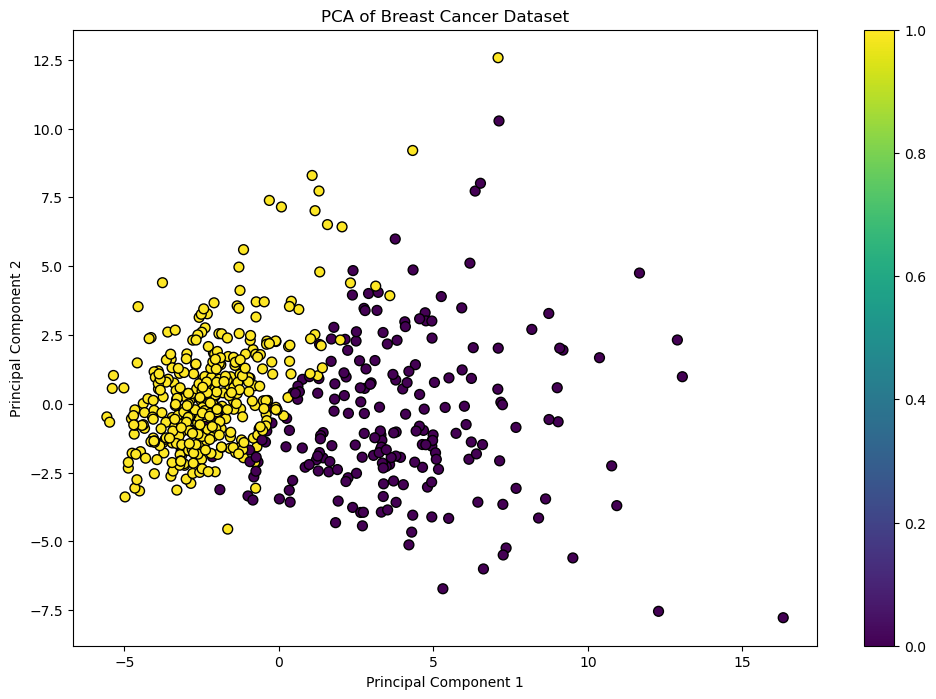

In [17]:
plt.figure(figsize=(12, 8))
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=cancer['target'], cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Breast Cancer Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()